#MNIST Neural Network from Scratch

Built a neural network using only NumPy to recognize handwritten digits (0-9). No frameworks like TensorFlow - just pure math and code.
What it does:

Trains on 60,000 handwritten digit images
Achieves 85%+ accuracy on test data
Shows predictions vs actual results

*   **Trains on 60,000 handwritten digit images**
*   **Achieves 85%+ accuracy on test data**
*   **Shows predictions vs actual results**






Architecture:
784 inputs → 10 hidden neurons → 10 outputs (digits 0-9)
Key learning: Understanding the math behind modern AI systems.





In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
%matplotlib inline # for notebook needed

Initializing my parameters for the layers ill be using ( one hidden layer, one output and input)

In [23]:
def initparams():
    W1= np.random.randn(10, 784)*0.01
    b1 = np.random.randn(10,1)*0.01
    W2 = np.random.randn(10,10)*0.01
    b2 = np.random.randn(10,1)*0.01
    return (W1,b1,W2,b2)

ReLU function to remove any negative numbers

In [24]:
def ReLU(Z):
    return np.maximum(0,Z)

Here I'm visualizing all the data ive gotten in the end using matplotlib, showing some examples of predications and actual data as well as the corresponding image, and also adding a confusion matrix.

In [25]:
def visualize_predictions(X_dev, Y_dev, predictions, num_samples=8):
    plt.figure(figsize=(16, 8))
    for i in range(num_samples):
        plt.subplot(2, 4, i+1)
        plt.imshow(X_dev[:, i].reshape(28, 28), cmap='gray')
        plt.title(f'Actual: {int(Y_dev[i])}\nPredicted: {int(predictions[i])}',
                 fontsize=10)
        plt.axis('off')

    plt.tight_layout(pad=2.0)
    plt.show()


    matrix = np.zeros((10, 10))


    for i in range(len(Y_dev)):
        matrix[Y_dev[i], predictions[i]] += 1


    plt.figure(figsize=(10, 8))
    plt.imshow(matrix, cmap='Blues')


    for i in range(10):
        for j in range(10):
            plt.text(j, i, int(matrix[i, j]), ha='center', va='center',
                    color='white' if matrix[i, j] > matrix.max()/2 else 'black')


    plt.xticks(range(10))
    plt.yticks(range(10))
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.colorbar()
    plt.tight_layout()
    plt.show()

Softmax to turn all raw outputs into probabilities that sum up to one

In [26]:
def softmax(Z):
    exp_Z = np.exp(Z - np.max(Z, axis=0, keepdims=True))
    return exp_Z / np.sum(exp_Z, axis=0, keepdims=True)

Determines which neurons recieve gradient updates from back propagation

In [27]:
def ReLU_Derivative(Z):
    return (Z>0).astype(float)

#Forward propagation method
using the standard linear function along with a ReLu for the first layer and softmax for the second

In [28]:
def forward_prop(W1,b1,W2,b2,X):
    Z1 = W1 @ X + b1
    A1 = ReLU(Z1)
    Z2 = W2 @ A1 + b2
    A2 = softmax(Z2)
    return Z1, A1 ,Z2 ,A2

#Backward propagation method
Calculates the error of the predicted from actual and uses it to calculte the change in weights and bias and uses those to calculate the change in weights and bias of the previous layers returning the needed change

In [29]:
def backward_prop(W1,b1,W2,b2,X2,X1,X,Y,Z1):
    m = X.shape[1]
    dZ2 = X2 - Y
    dW2 = 1/m * dZ2 @ X1.T
    db2 = (1/m) * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = W2.T @ dZ2 * ReLU_Derivative(Z1)
    dW1 = (1/m) * dZ1 @ X.T
    db1 = (1/m) * np.sum(dZ1, axis=1, keepdims=True)
    return db1,dW1,db2,dW2

#Update Params
Updates the parameters using the values of change receieved from the back propagation function and returns the new values

In [30]:
def update_params(W1,b1,W2,b2,db1,dW1,db2,dW2,learningrate):
    W1 += - learningrate*(dW1)
    b1 += - learningrate*(db1)
    W2 += - learningrate*(dW2)
    b2 += - learningrate*(db2)

    return W1,b1,W2,b2

#Training method
Runs the forward propagation, backward propagation and update methods sequentially a given number of times depending on the epochs and then runs the test data, and visualization method to give an idea of the results  ( I previously did this using print but that method wasn't as clear as matplotlib, as you can see it is commented out)

In [31]:
def training(X, Y, epochs, learningrate,X_dev , Y_dev):
    W1,b1,W2,b2 = initparams()

    for i in range(epochs):
        Z1, A1, Z2, A2 = forward_prop(W1,b1,W2,b2,X)
        db1,dW1,db2,dW2 = backward_prop(W1,b1,W2,b2,A2,A1,X,Y,Z1)
        W1,b1,W2,b2 = update_params(W1,b1,W2,b2,db1,dW1,db2,dW2,learningrate)

    Z1_dev, A1_dev, Z2_dev, A2_dev = forward_prop(W1, b1, W2, b2, X_dev)
    predictions_dev = np.argmax(A2_dev, axis=0)
    actual_dev = Y_dev
    count=0
    for k in range(len(predictions_dev)):
        if predictions_dev[k] == actual_dev[k]:
            count+=1

    visualize_predictions(X_dev, Y_dev, predictions_dev, num_samples=8)

    print(f"Final Dev Results:\n")
    print("Total Test cases:       \n", len(predictions_dev))
    print(f"Correct Predictions   :{count}/{len(predictions_dev)}\n")

    print(f"Accuracy:              {(count/len(predictions_dev)) * 100:.2f}\n")
    # print(f"Predicted -> {predictions_dev[:10]}\n")
    # print(f"Actual    -> {actual_dev[:10]}\n")
    # print("Confusion Matrix:\n")
    # print("Rows = Actual, Columns = Predicted/\n")
    # print("   ", end="")
    # for i in range(10):
    #     print(f"{i:3}", end="")
    # print()

    # for actual in range(10):
    #     print(f"{actual}: ", end="")
    #     for predicted in range(10):


    #         count = 0
    #         for k in range(len(predictions_dev)):
    #             if actual_dev[k] == actual and predictions_dev[k] == predicted:
    #                 count += 1

    #         print(f"{count:3}", end="")
    #     print()


    return W1, b1, W2, b2

##Main Method
Loads MNIST CSV data, preprocesses (normalize pixels, one-hot encode labels), splits train/test, and runs training pipeline. Does both training and testing - could be better named train_and_evaluate().

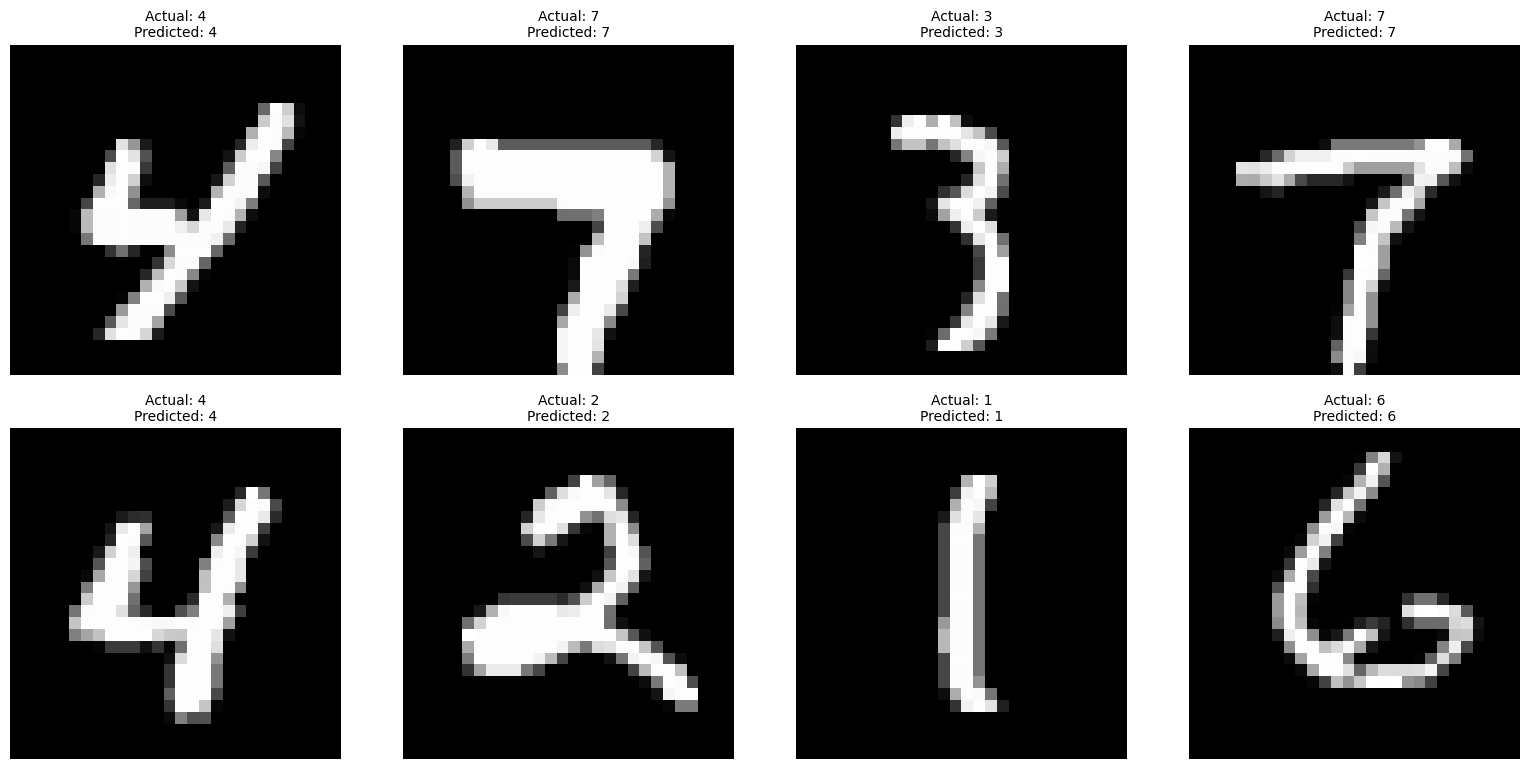

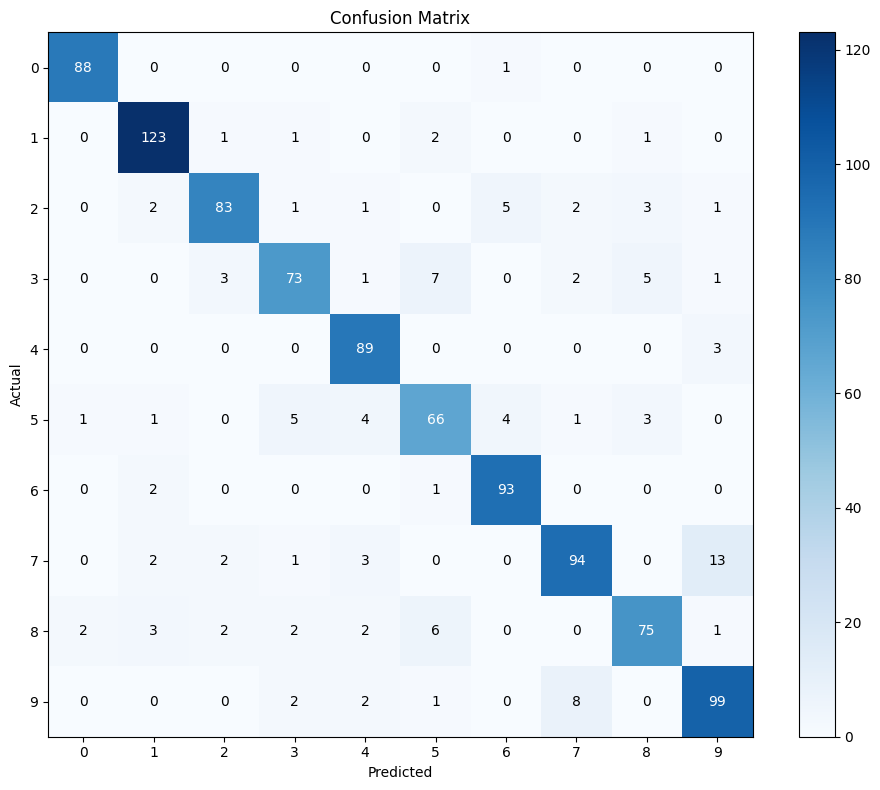

Final Dev Results:

Total Test cases:       
 1000
Correct Predictions   :883/1000

Accuracy:              88.30



In [32]:
def main():

    train_mnist = pd.read_csv("/content/mnist_train.csv")

    encoder = OneHotEncoder(sparse_output= False)


    data = np.array(train_mnist)
    n , m = data.shape
    np.random.shuffle(data)
    data_dev = data[0:1000].T
    X_dev = data_dev[1:]
    Y_dev = data_dev[0]
    epochs=200
    learningrate=0.3

    data_train = data[1000:].T
    X_train = data_train[1:]
    Y_train = data_train[0]
    X_train= X_train/255.0
    X_dev= X_dev/255.0

    Y_train_onehot = encoder.fit_transform(Y_train.reshape(-1, 1)).T
    Y_dev_onehot = encoder.fit_transform(Y_dev.reshape(-1, 1)).T
    training(X_train, Y_train_onehot, epochs, learningrate,X_dev,Y_dev)



main()